# Neural Networks

#### 210503H                           
#### I.P.D.D.Rajapaksha

In [6]:
!pip install torch
!pip install torchvision



[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 1.6/1.6 MB 2.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Listing 1

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/20, Loss: 0.9769290246963501
Epoch 2/20, Loss: 0.9498206155896187
Epoch 3/20, Loss: 0.9360823971033096
Epoch 4/20, Loss: 0.9275327330827713
Epoch 5/20, Loss: 0.9215981885194778
Epoch 6/20, Loss: 0.9171971751451492
Epoch 7/20, Loss: 0.9137861201167107
Epoch 8/20, Loss: 0.9110605976581574
Epoch 9/20, Loss: 0.9088332299590111
Epoch 10/20, Loss: 0.906981387257576
Epoch 11/20, Loss: 0.9054218543171882
Epoch 12/20, Loss: 0.9040946851372719
Epoch 13/20, Loss: 0.902956613600254
Epoch 14/20, Loss: 0.9019737314581872
Epoch 15/20, Loss: 0.901119857609272
Epoch 16/20, Loss: 0.900374957382679
Epoch 17/20, Loss: 0.8997224988341331
Epoch 18/20, Loss: 0.8991492050290107
Epoch 19/20, Loss: 0.8986438111066818
Epoch 20/20, Loss: 0.898197353899479


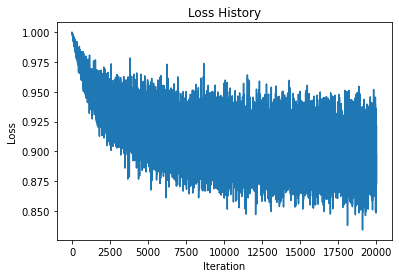

Training accuracy: 32.21%
Test accuracy: 32.42%


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot encoding

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


#### Add a middle layer with 100 nodes and a sigmoid activation

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Loss: 0.990307021200657
Epoch 2/20, Loss: 0.9740879511833191
Epoch 3/20, Loss: 0.9619989691376686
Epoch 4/20, Loss: 0.9528162389993667
Epoch 5/20, Loss: 0.9457215040922164
Epoch 6/20, Loss: 0.9401554464697838
Epoch 7/20, Loss: 0.9357281966209412
Epoch 8/20, Loss: 0.9321629281044006
Epoch 9/20, Loss: 0.9292596077919006
Epoch 10/20, Loss: 0.9268715609908104
Epoch 11/20, Loss: 0.9248895650506019
Epoch 12/20, Loss: 0.923231132030487
Epoch 13/20, Loss: 0.9218332878947259
Epoch 14/20, Loss: 0.9206473633646965
Epoch 15/20, Loss: 0.9196352431178093
Epoch 16/20, Loss: 0.9187668538093567
Epoch 17/20, Loss: 0.9180182052254677
Epoch 18/20, Loss: 0.91737002825737
Epoch 19/20, Loss: 0.9168066415190697
Epoch 20/20, Loss: 0.9163152393102646


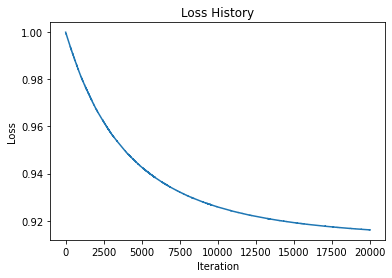

Training accuracy: 10.00%
Test accuracy: 10.00%


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size
H = 100  # Middle layer size
K = 10   # Output size
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, H) * std  # Weights for input to middle layer
b1 = torch.zeros(H)             # Biases for middle layer
w2 = torch.randn(H, K) * std     # Weights for middle layer to output
b2 = torch.zeros(K)              # Biases for output layer

# Hyperparameters
iterations = 20
lr = 2e-6
lr_decay = 0.9
reg = 0
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        h = x_train.mm(w1) + b1  # Middle layer activation
        h = torch.sigmoid(h)     # Sigmoid activation
        y_pred = h.mm(w2) + b2   # Output layer activation

        # Loss calculation
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dh = dy_pred.mm(w2.t()) * h * (1 - h)  # Backprop through sigmoid

        # Gradient calculation
        dw2 = h.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)
        dw1 = x_train.t().mm(dh) + reg * w1
        db1 = dh.sum(dim=0)

        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        hidden_layer = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden_layer.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        hidden_layer = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden_layer.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")
